In [75]:
from plotsettings import *

import numpy as np
import matplotlib.pyplot as plt
from copy import copy

In [76]:
sim_wd_red = [1.36736, 1.36660, 1.36556, 1.36420, 1.3625, 1.3603, 1.3554]  # drive frequency
sim_devdr_red = 2*np.asarray(sim_wd_red) - 2.735930  # deviation by driving
sim_wsb_red = [0.0001082, 0.0002441, 0.0004334, 0.0006784, 0.0009815, 0.001462, 0.002291]  # transition frequency
sim_wsb_th_red = [0.0001087, 0.0002446, 0.0004349, 0.0006793, 0.0009781, 0.0013309, 0.0021987]
sim_wd_red_Kerr = [1.37045, 1.37011, 1.36962, 1.36901, 1.3682, 1.3673, 1.3652]
sim_devdr_red_Kerr = 2*np.asarray(sim_wd_red_Kerr) - 2.7414
sim_wsb_red_Kerr = [0.00004354, 0.00009646, 0.0001720, 0.0002682, 0.0003965, 0.0005348, 0.0008842]

sim_wd_blue = [5.4375, 5.4318, 5.4238, 5.4131, 5.4002, 5.3843, 5.3460]  # drive frequency
sim_devdr_blue = 2*np.asarray(sim_wd_blue) - 10.88399  # deviation by driving
sim_wsb_blue = [0.0007594, 0.001719, 0.003103, 0.004899, 0.007200, 0.009999, 0.01812]  # transition frequency
sim_wsb_th_blue = [0.0007646, 0.0017077, 0.0030048, 0.0046312, 0.0065611, 0.0087547, 0.0138098]
sim_wd_blue_Kerr = [5.4424, 5.4384, 5.4327, 5.4254, 5.4164, 5.4057, 5.3791]
sim_devdr_blue_Kerr = 2*np.asarray(sim_wd_blue_Kerr) - 10.89133
sim_wsb_blue_Kerr = [0.0004543, 0.001014, 0.001807, 0.002842, 0.004125, 0.005648, 0.009512]

sim_eps = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]  # driving strength / 2

polydeg = 2
sim_wd_red_cfit = np.polyfit(sim_eps, sim_wd_red, polydeg)
sim_devdr_red_cfit = np.polyfit(sim_eps, sim_devdr_red, polydeg)
sim_wsb_red_cfit = np.polyfit(sim_eps, sim_wsb_red, polydeg)
sim_wd_blue_cfit = np.polyfit(sim_eps, sim_wd_blue, polydeg)
sim_devdr_blue_cfit = np.polyfit(sim_eps, sim_devdr_blue, polydeg)
sim_wsb_blue_cfit = np.polyfit(sim_eps, sim_wsb_blue, polydeg)

In [80]:
meas_wd_red = [1.3646, 1.3637, 1.3625, 1.3613, 1.3595, 1.3574, 1.3545]
meas_devdr_red = 2*np.asarray(meas_wd_red) - (6.811 - 4.0753)
meas_Pin_red = np.arange(-1, 6)
meas_wsb_red = 1*np.asarray([0.000317678, 0.000430714, 0.000553406, 0.000702018, 0.000876634, 0.001131206, 0.001423324])
meas_eps_red = list()
for i, devdr in enumerate(meas_devdr_red):
    p = copy(sim_devdr_red_cfit)
    p[-1] = p[-1] - devdr
    meas_eps_red.append(max(np.roots(p)))

meas_wd_blue = [5.42121, 5.4198, 5.4192, 5.4186, 5.41795, 5.4173, 5.4166, 5.4158, 5.4149, 5.4140, 5.4130, 5.41185, 5.41065, 5.40785, 5.40440, 5.39170, 5.38407]
meas_devdr_blue = 2*np.asarray(meas_wd_blue) - 10.88399
meas_Pin_blue = np.array([-12, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 3, 5, 10, 12])
meas_wsb_blue = [0.001573, 0.002127, 0.002247, 0.002247, 0.002524, 0.002543, 0.002627, 0.002749, 0.002842, 0.002933, 0.003088, 0.003207, 0.003440, 0.003646, 0.004123, 0.005403, 0.006483]
meas_eps_blue = list()
for i, devdr in enumerate(meas_devdr_blue):
    p = copy(sim_devdr_blue_cfit)
    p[-1] = p[-1] - devdr
    meas_eps_blue.append(max(np.roots(p)))
print(meas_eps_blue)

[0.42599627133122586, 0.4398484108347068, 0.4456055950214504, 0.4512855889483969, 0.4573553111959632, 0.4633415786439211, 0.46969883531012946, 0.47685550354460055, 0.4847745025905101, 0.49256027293127597, 0.501062768725161, 0.5106578080352941, 0.5204731767498648, 0.5426567054094077, 0.568753820810144, 0.6556281788223501, 0.7025094638626402]


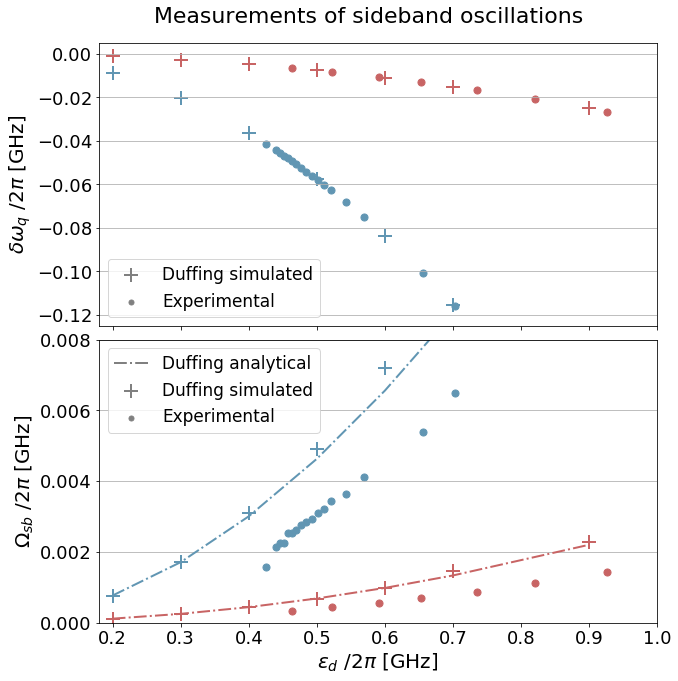

In [90]:
xlim = [0.18, 1.0]

plt.subplots(1, 2, figsize=(10,10))
plt.suptitle("Measurements of sideband oscillations")

plt.subplot(2, 1, 1)
plt.scatter(sim_eps, sim_devdr_red, c=plotcolours['sbred'], marker=markerstyles['simulated'], s=200)
plt.scatter(sim_eps, sim_devdr_blue, c=plotcolours['sbblue'], marker=markerstyles['simulated'], s=200)
plt.scatter(meas_eps_red, meas_devdr_red, c=plotcolours['sbred'], marker=markerstyles['experimental'], s=200)
plt.scatter(meas_eps_blue, meas_devdr_blue, c=plotcolours['sbblue'], marker=markerstyles['experimental'], s=200)
# plt.scatter(sim_eps, sim_devdr_red_Kerr, c=plotcolours['sbred'], marker=markerstyles['Kerr'], s=markersizes['Kerr'])
# plt.scatter(sim_eps, sim_devdr_blue_Kerr, c=plotcolours['sbblue'], marker=markerstyles['Kerr'], s=markersizes['Kerr'])

plt.xlim(xlim)
plt.ylim([-0.125, 0.005])
# plt.xlabel("$\\epsilon_d/2$ $/2\\pi$ [GHz]")
plt.gca().set_xticklabels([])
plt.ylabel("$\\delta\omega_q$ $/2\\pi$ [GHz]")
# plt.title("Deviation by driving")
plt.grid(b=True, axis='y')

plt.scatter(0, 0, c='gray', marker=markerstyles['simulated'], s=markersizes['simulated'], label='Duffing simulated')
# plt.scatter(0, 0, c='gray', marker=markerstyles['Kerr'], s=markersizes['Kerr'], label='Kerr simulated')
plt.scatter(0, 0, c='gray', marker=markerstyles['experimental'], s=markersizes['experimental'], label='Experimental')
plt.legend(loc='lower left')

plt.subplot(2, 1, 2)
plt.scatter(sim_eps, sim_wsb_red, c=plotcolours['sbred'], marker=markerstyles['simulated'], s=200)
plt.scatter(sim_eps, sim_wsb_blue, c=plotcolours['sbblue'], marker=markerstyles['simulated'], s=200)
plt.scatter(meas_eps_red, meas_wsb_red, c=plotcolours['sbred'], marker=markerstyles['experimental'], s=200)
plt.scatter(meas_eps_blue, meas_wsb_blue, c=plotcolours['sbblue'], marker=markerstyles['experimental'], s=200)
# plt.scatter(sim_eps, sim_wsb_red_Kerr, c=plotcolours['sbred'], marker=markerstyles['Kerr'], s=markersizes['Kerr'])
# plt.scatter(sim_eps, sim_wsb_blue_Kerr, c=plotcolours['sbblue'], marker=markerstyles['Kerr'], s=markersizes['Kerr'])
plt.plot(sim_eps, sim_wsb_th_red, c=plotcolours['sbred'], ls='-.')
plt.plot(sim_eps, sim_wsb_th_blue, c=plotcolours['sbblue'], ls='-.')

plt.xlim(xlim)
plt.ylim([0, 0.008])
plt.xlabel("$\\epsilon_d$ $/2\\pi$ [GHz]")
plt.ylabel("$\\Omega_{{sb}}$ $/2\\pi$ [GHz]")
# plt.title("Sideband coupling")
plt.grid(b=True, axis='y')

plt.scatter(0, 0, c='gray', marker=markerstyles['simulated'], s=markersizes['simulated'], label='Duffing simulated')
# plt.scatter(0, 0, c='gray', marker=markerstyles['Kerr'], s=markersizes['Kerr'], label='Kerr simulated')
plt.scatter(0, 0, c='gray', marker=markerstyles['experimental'], s=markersizes['experimental'], label='Experimental')
plt.plot(0, 0, c='gray', ls=linestyles['analytical'], label='Duffing analytical')
plt.legend(loc='upper left')

plt.subplots_adjust(wspace=0.6)
plt.subplots_adjust(hspace=0.05)
plt.subplots_adjust(top=0.93)
plt.show()

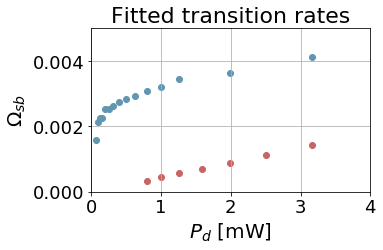

In [83]:
plt.figure(figsize=(5,3))
plt.scatter(10**(meas_Pin_red/10), meas_wsb_red, c=plotcolours['sbred'], label='Red transitions')
plt.scatter(10**(meas_Pin_blue/10), meas_wsb_blue, c=plotcolours['sbblue'], label='Blue transitions')
plt.ylabel("$\\Omega_{{sb}}$")
plt.xlabel("$P_d$ [mW]")
plt.xlim([0, 4])
plt.ylim([0, 0.005])
# plt.legend()
plt.title("Fitted transition rates")
plt.grid(True)
plt.show()

In [81]:
x = []
for eps in meas_eps_blue:
    p = copy(sim_wsb_blue_cfit)
    x.append(p[0]*eps**2 + p[1]*eps + p[2])
print(meas_wsb_blue/np.asarray(x))

[0.4669957  0.58852365 0.60411303 0.58740228 0.64053984 0.62697064
 0.62831891 0.63568632 0.63344055 0.63081812 0.63915572 0.63611386
 0.65374534 0.6307476  0.6415821  0.61007836 0.62659434]
